<div style="font-size: 30px">
    
**Intermediate project 1**

**Project Description**

Based on the provided data on game sales, user and expert ratings, genres and platforms (for example, Xbox or PlayStation), it is necessary to identify patterns that determine the success of the game for the online store "Streamchik". The results of the study will allow you to bet on a potentially popular product and plan advertising campaigns. 

Data up to 2016 is available. Data for 2016 may be incomplete.

The abbreviation ESRB (Entertainment Software Rating Board) comes across in the dataset. ESRB is an association that determines the age rating of computer games. ESRB evaluates game content and assigns it a suitable age category, for example, "For adults", "For younger children" or "For teenagers".
Let's imagine that it's December 2016, and you're planning a campaign for 2017. We need to work out the principle of working with data. It does not matter whether you forecast sales for 2017 according to 2016 data or 2027 according to 2026 data.


**Data description**

Name — the name of the game

Platform — platform

Year_of_Release — year of release

Genre — genre of the game

NA_sales — sales in North America (millions of copies sold)

EU_sales — sales in Europe (millions of copies sold)

JP_sales — sales in Japan (millions of copies sold)

Other_sales — sales in other countries (millions of copies sold)

Critic_Score — critics' score (maximum 100)

User_Score — user rating (maximum 10)

Rating — rating from the ESRB organization (Entertainment Software Rating Board). This association determines the rating of computer 
games and assigns them a suitable age category.

<div style="font-size: 20px">
    
**Table of contents:**

<div style="font-size: 15px">

1. Loading and initial data study
    

2. Data preprocessing

    
3. Exploratory data analysis

    
4. Portrait of the user of each region

    
5. Hypothesis testing

    
6. Final conclusion

In [1]:
import pandas as pd
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style('darkgrid')


import warnings
import scipy

from scipy import stats as st


In [2]:
# Disable Anaconda warnings
warnings.simplefilter('ignore')

# Default chart size
from pylab import rcParams
rcParams['figure.figsize'] = 20, 10

title_font = {'size':'16', 'color':'black', 'weight':'bold', 'verticalalignment':'bottom'}
axis_font = {'size':'14', 'weight': 'bold'}

# Setting the maximum number of columns in a dateframe
pd.set_option('display.max_columns', None)

In [3]:
# importing the magnitude interpolator library
from scipy.interpolate import interp1d
# entering an interpolator for proportional display of pie chart radius
m = interp1d([0,1],[0.5,1])

# 1. Loading and initial data study

In [4]:
df_games = pd.read_csv('games.csv')

df_games.head()

,Name,Platform,Year_of_Release,Genre,NA_sales,EU_sales,JP_sales,Other_sales,Critic_Score,User_Score,Rating
0,Wii Sports,Wii,2006.0,Sports,41.36,28.96,3.77,8.45,76.0,8,E
1,Super Mario Bros.,NES,1985.0,Platform,29.08,3.58,6.81,0.77,NaN,NaN,NaN
2,Mario Kart Wii,Wii,2008.0,Racing,15.68,12.76,3.79,3.29,82.0,8.3,E
3,Wii Sports Resort,Wii,2009.0,Sports,15.61,10.93,3.28,2.95,80.0,8,E
4,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,11.27,8.89,10.22,1.00,NaN,NaN,NaN


In [5]:
df_games.tail()

,Name,Platform,Year_of_Release,Genre,NA_sales,EU_sales,JP_sales,Other_sales,Critic_Score,User_Score,Rating
16710,Samurai Warriors: Sanada Maru,PS3,2016.0,Action,0.00,0.00,0.01,0.0,NaN,NaN,NaN
16711,LMA Manager 2007,X360,2006.0,Sports,0.00,0.01,0.00,0.0,NaN,NaN,NaN
16712,Haitaka no Psychedelica,PSV,2016.0,Adventure,0.00,0.00,0.01,0.0,NaN,NaN,NaN
16713,Spirits & Spells,GBA,2003.0,Platform,0.01,0.00,0.00,0.0,NaN,NaN,NaN
16714,Winning Post 8 2016,PSV,2016.0,Simulation,0.00,0.00,0.01,0.0,NaN,NaN,NaN


In [6]:
df_games.sample(5)

,Name,Platform,Year_of_Release,Genre,NA_sales,EU_sales,JP_sales,Other_sales,Critic_Score,User_Score,Rating
4806,"Transformers: Revenge of the Fallen (XBox 360,...",PSP,2009.0,Shooter,0.17,0.14,0.00,0.08,NaN,NaN,NaN
12939,Shaman King: Soul Fight,GC,2003.0,Platform,0.00,0.00,0.05,0.00,NaN,NaN,NaN
14991,I Heart Geeks,DS,2011.0,Puzzle,0.02,0.00,0.00,0.00,NaN,NaN,NaN
2842,Kirby: Canvas Curse,DS,2005.0,Platform,0.36,0.00,0.32,0.03,86.0,8.2,E
5813,KuruKuru Kururin,GBA,2001.0,Puzzle,0.00,0.00,0.30,0.01,NaN,NaN,NaN


In [7]:
df_games.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16715 entries, 0 to 16714
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Name             16713 non-null  object 
 1   Platform         16715 non-null  object 
 2   Year_of_Release  16446 non-null  float64
 3   Genre            16713 non-null  object 
 4   NA_sales         16715 non-null  float64
 5   EU_sales         16715 non-null  float64
 6   JP_sales         16715 non-null  float64
 7   Other_sales      16715 non-null  float64
 8   Critic_Score     8137 non-null   float64
 9   User_Score       10014 non-null  object 
 10  Rating           9949 non-null   object 
dtypes: float64(6), object(5)
memory usage: 1.4+ MB


In [8]:
# let's determine the proportion of empty values in each of the columns

columns = df_games.columns
for column in columns:
    percent = round(df_games[column].isna().sum() / len(df_games) * 100, 3)
    print(f'Column {column} has {percent}% of missing values')

Column Name has 0.012% of missing values
Column Platform has 0.0% of missing values
Column Year_of_Release has 1.609% of missing values
Column Genre has 0.012% of missing values
Column NA_sales has 0.0% of missing values
Column EU_sales has 0.0% of missing values
Column JP_sales has 0.0% of missing values
Column Other_sales has 0.0% of missing values
Column Critic_Score has 51.319% of missing values
Column User_Score has 40.09% of missing values
Column Rating has 40.479% of missing values


<div style="font-size: 20px">
    
**Intermediate conclusion:**

1) the column names shall be brought to the lower case;

2) the values in the name, platform, genre columns shall be brought to lowercase;

3) The values in the years of release, user_score column require changing the data type;

4) the missing values shall be filled in and our data shall be checked for duplicates;

5) The columns critic_score, user_score, rating have a significant number of missing values.

# 2. Data preprocessing

In [9]:
# Bringing column names and column values to lowercase
df_games.columns = df_games.columns.str.lower()

# bringing values in the name, platform, genre columns to lowercase
columns = ['name', 'platform', 'genre']

for column in columns:
    df_games[column] = df_games[column].str.lower()

In [10]:
df_games.columns

Index(['name', 'platform', 'year_of_release', 'genre', 'na_sales', 'eu_sales',
       'jp_sales', 'other_sales', 'critic_score', 'user_score', 'rating'],
      dtype='object')

In [11]:
df_games.sample(10)

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
4517,okamiden,ds,2010.0,adventure,0.21,0.06,0.13,0.02,82.0,7.9,E10+
11650,criminal girls: invite only,psp,2010.0,role-playing,0.00,0.00,0.08,0.00,NaN,NaN,NaN
2627,battle stations,ps,1997.0,strategy,0.43,0.29,0.00,0.05,NaN,NaN,NaN
16346,lumo,psv,2016.0,puzzle,0.00,0.01,0.00,0.00,NaN,tbd,E10+
16269,tactics layer: ritina guard senki,ds,2009.0,strategy,0.00,0.00,0.01,0.00,NaN,NaN,NaN
9274,travel games for dummies,ds,2008.0,misc,0.12,0.00,0.00,0.01,62.0,tbd,E
1690,lego batman 2: dc super heroes,ps3,2012.0,action,0.50,0.50,0.00,0.19,81.0,7.5,E10+
13885,twin strike: operation thunder,wii,2008.0,shooter,0.04,0.00,0.00,0.00,50.0,8.3,E10+
960,sonic & knuckles,gen,1994.0,platform,1.24,0.43,0.03,0.12,NaN,NaN,NaN
13761,heroes of might and magic v,pc,2006.0,strategy,0.00,0.03,0.00,0.01,77.0,7.9,T


Bringing of column names and values to lowercase was made successfully. Let's replace the data type in the column **year_of_release** with int64, since years cannot be float values. The values of the ratings in the **user_score** column have the form of a float number, although they are stored as an object. Let's bring **user_score** to the type of float numbers.

In [12]:
# Check for duplicates in the name column

df_games['name'].duplicated().sum()

5155

In [13]:
# Let's delete duplicate lines
df_games = df_games.drop_duplicates(subset=['name'], keep='last').reset_index(drop=True)

In [14]:
df_games.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11560 entries, 0 to 11559
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   name             11559 non-null  object 
 1   platform         11560 non-null  object 
 2   year_of_release  11379 non-null  float64
 3   genre            11559 non-null  object 
 4   na_sales         11560 non-null  float64
 5   eu_sales         11560 non-null  float64
 6   jp_sales         11560 non-null  float64
 7   other_sales      11560 non-null  float64
 8   critic_score     4727 non-null   float64
 9   user_score       5928 non-null   object 
 10  rating           5875 non-null   object 
dtypes: float64(6), object(5)
memory usage: 993.6+ KB


In [15]:
# Let's check what kind of string has NaN in the name

display(df_games.loc[df_games['name'].isna() == True])

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
9251,NaN,gen,1993.0,NaN,0.0,0.0,0.03,0.0,NaN,NaN,NaN


Since the considered line is the only one, and also has 0 sales figures, it is proposed to delete it

In [16]:
df_games = df_games.dropna(subset=['name'])

In [17]:
print(df_games.loc[df_games['user_score'] == 'tbd']['user_score'].count())

1695


In [18]:
display(df_games.loc[df_games['user_score'] == 'tbd'])

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
258,zumba fitness 2,wii,2011.0,sports,1.51,1.03,0.0,0.27,NaN,tbd,T
308,udraw studio,wii,2010.0,misc,1.65,0.57,0.0,0.20,71.0,tbd,E
314,frogger's adventures: temple of the frog,gba,NaN,adventure,2.15,0.18,0.0,0.07,73.0,tbd,E
344,just dance kids,wii,2010.0,misc,1.52,0.54,0.0,0.18,NaN,tbd,E
349,dance dance revolution x2,ps2,2009.0,simulation,1.09,0.85,0.0,0.28,NaN,tbd,E10+
...,...,...,...,...,...,...,...,...,...,...,...
11540,planet monsters,gba,2001.0,action,0.01,0.00,0.0,0.00,67.0,tbd,E
11542,bust-a-move 3000,gc,2003.0,puzzle,0.01,0.00,0.0,0.00,53.0,tbd,E
11543,mega brain boost,ds,2008.0,puzzle,0.01,0.00,0.0,0.00,48.0,tbd,E
11549,plushees,ds,2008.0,simulation,0.01,0.00,0.0,0.00,NaN,tbd,E


**TBD (to be determined)** - the values will be determined in the future (one of the possible reasons may be the lack of a programmatically implemented opportunity for users to set a rating for these games). Since there is no data in these lines at the time of analysis, it is proposed to replace tbd with None, and then change the data type to float

In [19]:
df_games['user_score'] = df_games['user_score'].replace('tbd', None)

In [20]:
# Replacing the data type in the year_of_release, user_score columns

df_games['year_of_release'] = df_games['year_of_release'].astype(pd.Int64Dtype())

In [21]:
df_games['user_score'] = pd.to_numeric(df_games['user_score'])

In [22]:
df_games.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 11559 entries, 0 to 11559
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   name             11559 non-null  object 
 1   platform         11559 non-null  object 
 2   year_of_release  11378 non-null  Int64  
 3   genre            11559 non-null  object 
 4   na_sales         11559 non-null  float64
 5   eu_sales         11559 non-null  float64
 6   jp_sales         11559 non-null  float64
 7   other_sales      11559 non-null  float64
 8   critic_score     4727 non-null   float64
 9   user_score       4939 non-null   float64
 10  rating           5875 non-null   object 
dtypes: Int64(1), float64(6), object(4)
memory usage: 1.1+ MB


Data types were replaced successfully

**Total sales in all regions:**

In [23]:
# Total sales

df_games['total_sales'] = df_games['na_sales'] + df_games['eu_sales'] + df_games['jp_sales'] + df_games['other_sales']

In [24]:
df_games.head()

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,total_sales
0,wii sports,wii,2006,sports,41.36,28.96,3.77,8.45,76.0,8.0,E,82.54
1,mario kart wii,wii,2008,racing,15.68,12.76,3.79,3.29,82.0,8.3,E,35.52
2,wii sports resort,wii,2009,sports,15.61,10.93,3.28,2.95,80.0,8.0,E,32.77
3,pokemon red/pokemon blue,gb,1996,role-playing,11.27,8.89,10.22,1.00,NaN,NaN,NaN,31.38
4,new super mario bros.,ds,2006,platform,11.28,9.14,6.50,2.88,89.0,8.5,E,29.80


**Let's check the unique values in a number of columns, as well as game sales by year:**

Based on the data obtained , it will be possible to determine:

1) Is it possible to fill in the missing values with average values or median;

2) What is the spread of values;

3) The most popular video game genres;

4) Are there outliers and incorrect values.


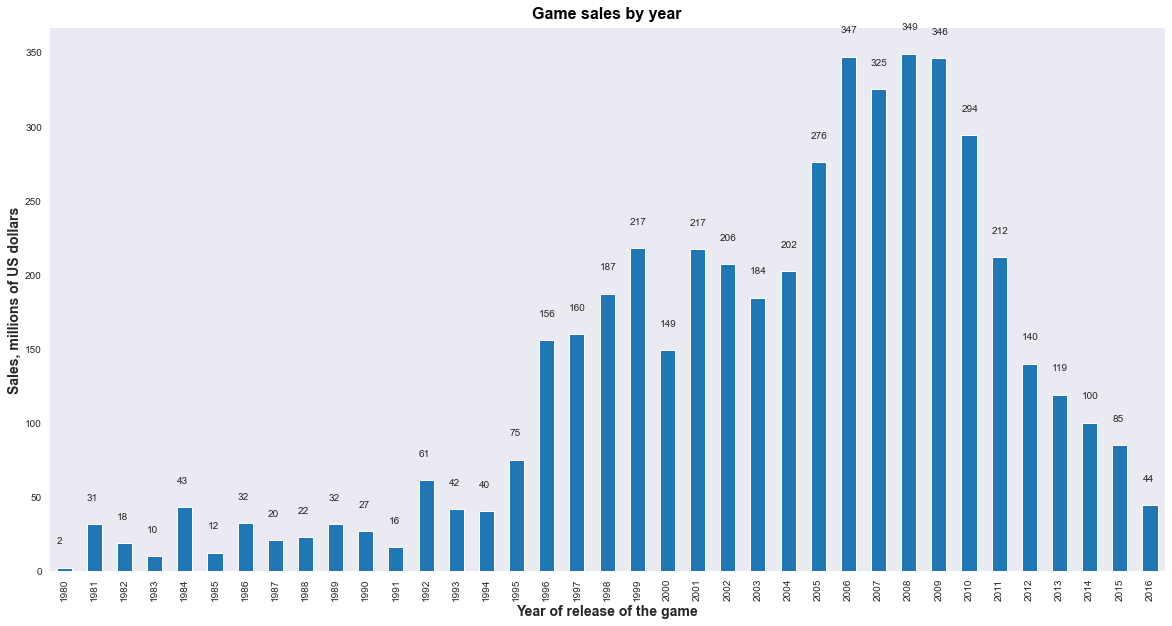

In [25]:
# Game sales by year

ax = df_games.groupby('year_of_release')['total_sales'].sum().plot.bar()

for p in ax.patches:
    ax.annotate(str(int(p.get_height())),
               (p.get_x(), p.get_height() + 16),
               rotation = 0)
plt.title('Game sales by year', **title_font)
plt.xlabel('Year of release of the game', **axis_font)
plt.ylabel('Sales, millions of US dollars', **axis_font)
sns.despine()
plt.grid()
plt.show()

In [26]:
topics = ['year_of_release', 'genre', 'critic_score', 'user_score', 'rating']

for topic in topics:
    print(f'In the column {topic} we can see the following data:')
    print()
    print(df_games[topic].value_counts().sort_values(ascending=False))
    print()
    print('-------------------------')
    try:
        x = round(df_games[topic].describe(), 2)
        print(f'General description of the spread of column values {topic}:')
        print()
        print(x)
        print()
        print('-------------------------')
    except TypeError:
        continue

In the column year_of_release we can see the following data:

2008    979
2009    955
2010    851
2007    831
2006    731
2011    731
2005    627
2002    578
2004    510
2003    507
2012    408
2001    386
2015    345
1998    330
1999    303
2013    303
2014    301
2000    299
2016    294
1997    257
1996    238
1995    202
1994     97
1993     57
1981     43
1992     35
1991     34
1982     33
1986     18
1987     15
1990     14
1983     14
1989     13
1985     12
1984     11
1988     11
1980      5
Name: year_of_release, dtype: Int64

-------------------------
General description of the spread of column values year_of_release:

count    11378.00
mean      2005.81
std          6.09
min       1980.00
25%       2002.00
50%       2007.00
75%       2010.00
max       2016.00
Name: year_of_release, dtype: float64

-------------------------
In the column genre we can see the following data:

action          1955
sports          1379
misc            1329
role-playing    1226
adventure       1

In [27]:
df_games = df_games[df_games['year_of_release'] != '<NA>']
df_games['year_of_release'].unique()

<IntegerArray>
[2006, 2008, 2009, 1996, 1984, 2005, 1999, 2007, 2010, 1989, 2002, 2001, 1998,
 2013, 2011, 2014, 2004, 1992, 1997, 1993, 2012, 1988, 2016, 2003, 1986, 2000,
 1994, 1995, 1990, 2015, 1981, 1987, 1985, 1983, 1991, 1982, 1980]
Length: 37, dtype: Int64

In [28]:
df_games = df_games.loc[(df_games['year_of_release'] >= 1995) & (df_games['year_of_release'] < 2016)]
#df_games = df_games.query('(year_of_release >= 1995) and (year_of_release < 2016)')

In [29]:
df_games.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 10672 entries, 0 to 11558
Data columns (total 12 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   name             10672 non-null  object 
 1   platform         10672 non-null  object 
 2   year_of_release  10672 non-null  Int64  
 3   genre            10672 non-null  object 
 4   na_sales         10672 non-null  float64
 5   eu_sales         10672 non-null  float64
 6   jp_sales         10672 non-null  float64
 7   other_sales      10672 non-null  float64
 8   critic_score     4528 non-null   float64
 9   user_score       4731 non-null   float64
 10  rating           5637 non-null   object 
 11  total_sales      10672 non-null  float64
dtypes: Int64(1), float64(7), object(4)
memory usage: 1.1+ MB


In [30]:
# let's determine the proportion of missing values in each of the columns

columns = ['critic_score', 'user_score', 'rating']
for column in columns:
    percent = round(df_games[column].isna().sum() / len(df_games) * 100, 2)
    print(f'Column {column} has {percent}% missing values')

Column critic_score has 57.57% missing values
Column user_score has 55.67% missing values
Column rating has 47.18% missing values


Taking into account the significance of the missing values in these columns, we will analyze their distribution by year

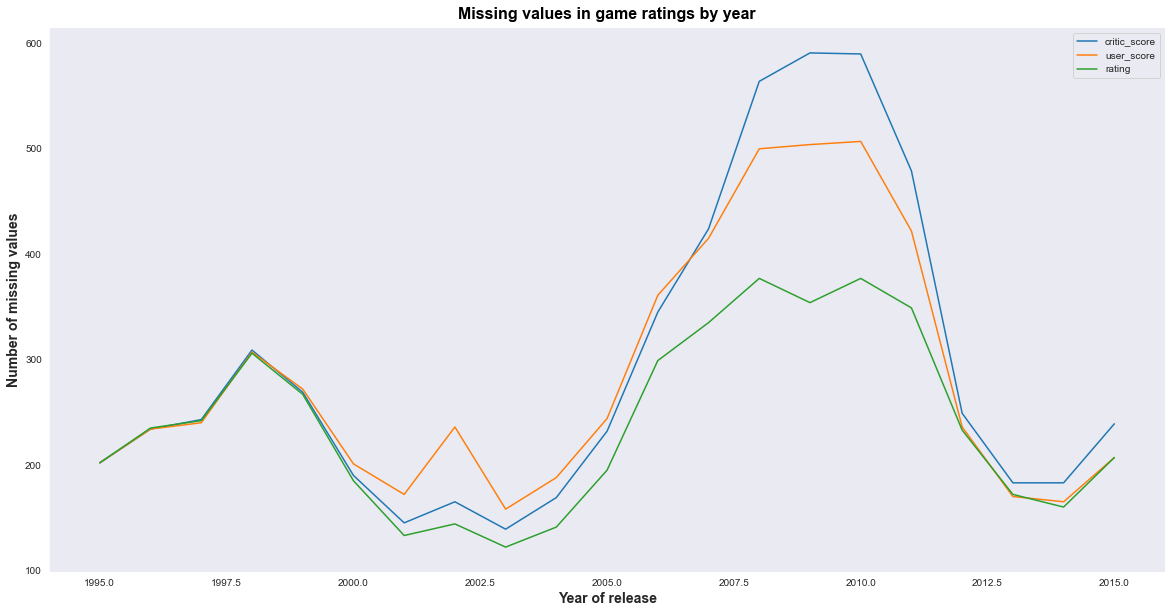

In [31]:
columns = ['critic_score', 'user_score', 'rating']

for column in columns:
     df_games[df_games[column].isna()].groupby(by='year_of_release')['name'].count().plot(label = column)

        
plt.title('Missing values in game ratings by year', **title_font)
plt.xlabel('Year of release', **axis_font)
plt.ylabel('Number of missing values', **axis_font)
sns.despine()
plt.legend()
plt.grid(False)
plt.show()

<div style="font-size: 20px">
    
**Intermediate conclusion:**

1) The collected data for 2016, as well as for the period up to 1995, is not enough to take them into account in further analysis, therefore it is proposed to use the data for 1995-2015 (inclusive) in the future;

2) After eliminating duplicates and determining the most representative years for the analysis, missing values in the columns critic_score, user_score, rating were preserved.However, taking into account the spread of values in these columns, as well as the significance of the number of gaps in each of them, I think it is inappropriate to fill in the gaps (with average or median values), since this can potentially significantly affect the conclusions of the survey;

3) It should be noted that the distribution of omissions in the rating columns by year is not random:
    
    - until 2000, the number of omissions in different columns is almost the same;
    
    - after 2002, there has been an increase in the number of omissions in all rating columns (the maximum values are for 2007-2010) - this is probably due to an increase in the number of games being released and the fact that not all of them were sent for appropriate evaluation (in particular, games by independent developers).

# 3. Exploratory data analysis

<div style="font-size: 20px">
    
**Determining the sales cycle of games on the respective platforms**

Let's analyze video game sales by platform and build a distribution by year of the most popular platforms

<AxesSubplot:xlabel='year_of_release', ylabel='platform'>

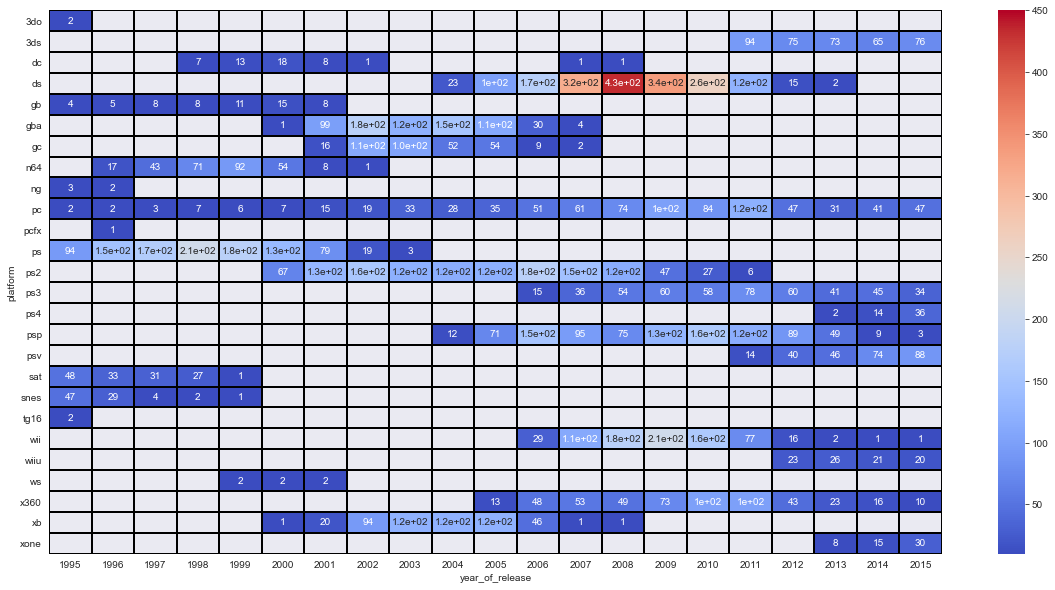

In [32]:
# heatmap of game sales on the respective platforms

year_platform_sales = df_games.pivot_table(index=['platform'],  columns='year_of_release', values = 'total_sales',  aggfunc='count')

sns.heatmap(year_platform_sales, annot=True, vmin=10, vmax=450,  cmap = 'coolwarm', linewidth=1, linecolor='black')

In [33]:
# Estimation of the average sales cycle by platform
platforms_sales_circle = df_games.pivot_table(index=['platform'], columns='year_of_release', values='total_sales', aggfunc='sum')


print('Average game sales cycle by platform:',round(platforms_sales_circle.gt(0).sum(axis=1).mean(), 2))

Average game sales cycle by platform: 6.85


According to the graph above, it can be concluded that sales of games on the corresponding platform go through a cycle of 6-7 years from the moment of appearance until the moment of termination of sales. Based on this, we can conclude that **for further research and planning of the advertising program for 2017, games on platforms should be taken no later than 2010 (for the last 6 years)**.

<div style="font-size: 20px">
    
**Determination of the most popular platforms for game sales**

Let's highlight the platforms with the highest total sales for the period from 2010 to 2015.

In [34]:
# Let's allocate data for the period from 2010 to 2015 to a separate dataframe

df_games_actual = df_games.loc[df_games['year_of_release'] >= 2010]

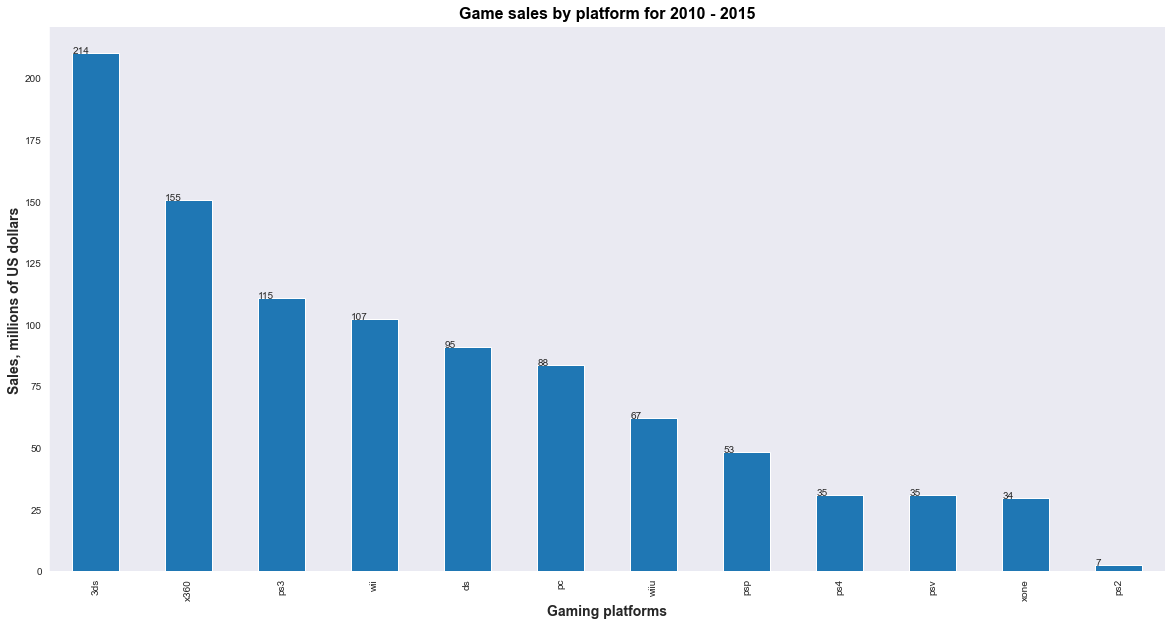

In [35]:
# Game sales by year
ax = df_games_actual.groupby(by='platform')['total_sales'].sum().sort_values(ascending=False).plot.bar(figsize=(20,10))

for p in ax.patches:
    ax.annotate(str(int(p.get_height() + 5)),
               (p.get_x(), p.get_height()),
               rotation = 0)
plt.title('Game sales by platform for 2010 - 2015', **title_font)
plt.xlabel('Gaming platforms', **axis_font)
plt.ylabel('Sales, millions of US dollars', **axis_font)
sns.despine()
plt.grid()
plt.show()

According to total sales, the first 6 platforms can be distinguished: **3ds** (214 million), **x360** (155 million), **ps3** (115 million), **wii** (107 million), **ds**(95 million), **pc** (88 million).

**It is interesting to note** that despite the fact that the latest versions of PS 4 / PS 5 and XOne do not stand out with significant sales figures in the specified period, but show significant dynamics of sales growth (a positive trend), I consider it advisable not to exclude their further research.

In [36]:
# We will leave data in the dataframe only for the selected platforms for 2010-2015

top_platforms = ['3ds', 'x360', 'ps3', 'ps4', 'psv','wii', 'ds', 'pc', 'xone']

df_games_actual = df_games_actual.query('platform in @top_platforms')

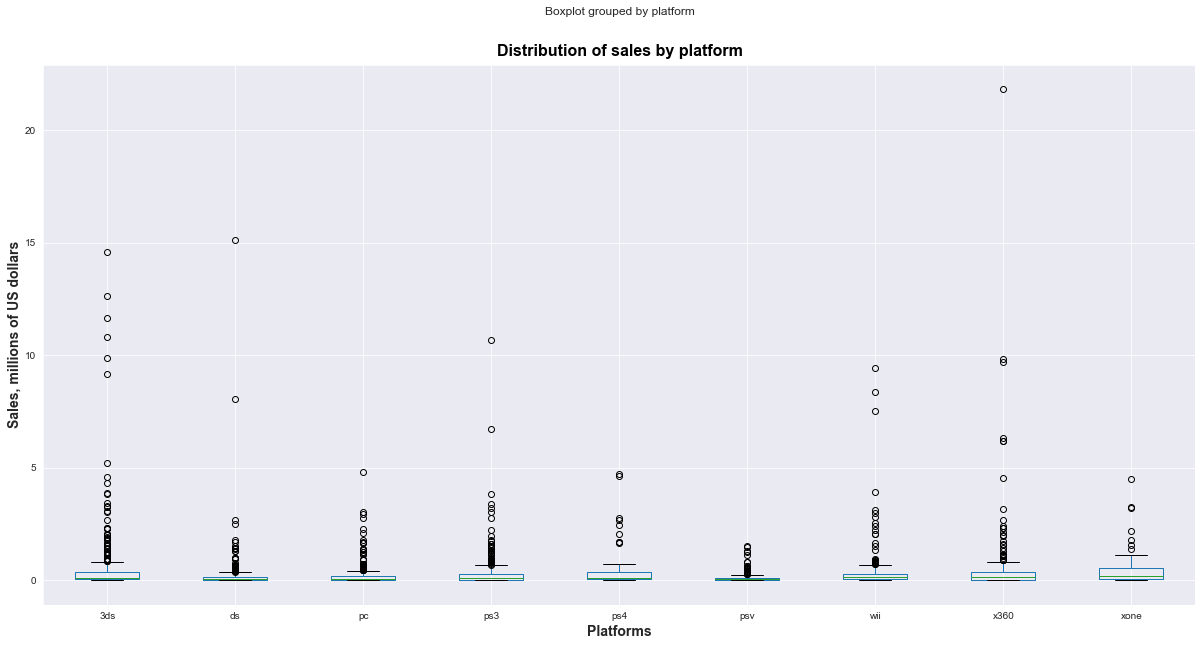

In [37]:
bp = df_games_actual.boxplot(column='total_sales',by='platform')

plt.title('Distribution of sales by platform', **title_font)
plt.xlabel('Platforms', **axis_font)
plt.ylabel('Sales, millions of US dollars', **axis_font)
plt.show()

Distributions have a significant number of outliers. Let's build a graph of distributions without outliers in order to determine the average values of sales depending on the platform

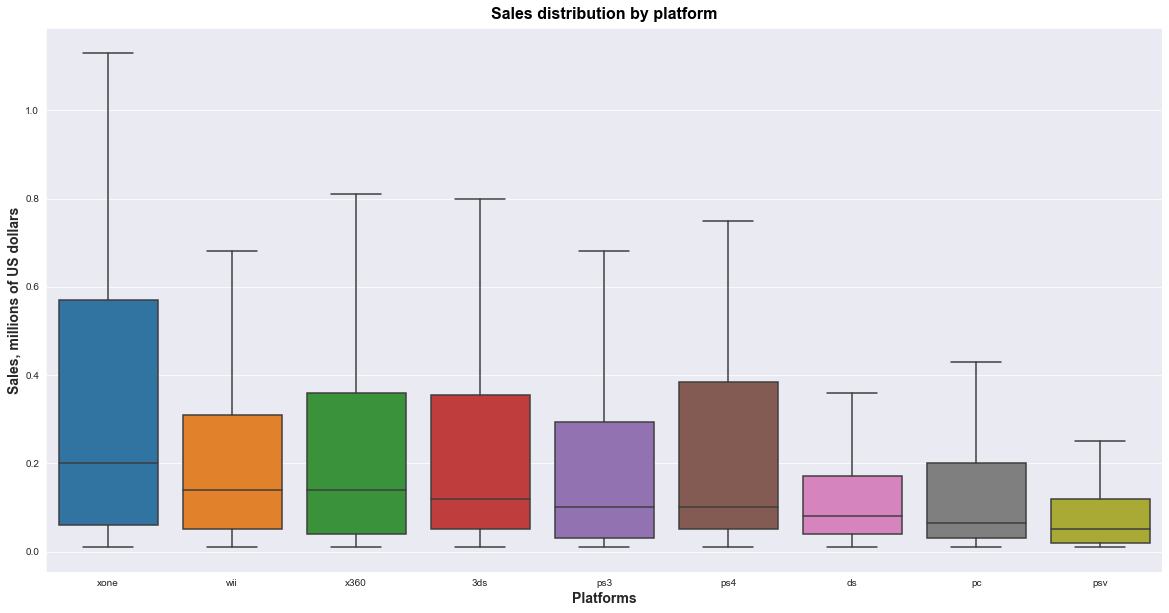

In [38]:
# Plotting the distribution in descending order of the median value of sales by platform (without outliers)
sns.boxplot(
    data = df_games_actual, 
    x = 'platform', 
    order = df_games_actual.groupby(by=['platform'])['total_sales'].median().sort_values(ascending = False).index, 
    y = 'total_sales',
    showfliers = False)

plt.title('Sales distribution by platform', **title_font)
plt.xlabel('Platforms', **axis_font)
plt.ylabel('Sales, millions of US dollars', **axis_font)
plt.show()

* Median sales figures of the three best-selling platforms are about $0.15 million


* The average sale of a game on a PC is 2 times less than that of the latest generation consoles.

Let's analyze the sales trends of current platforms:

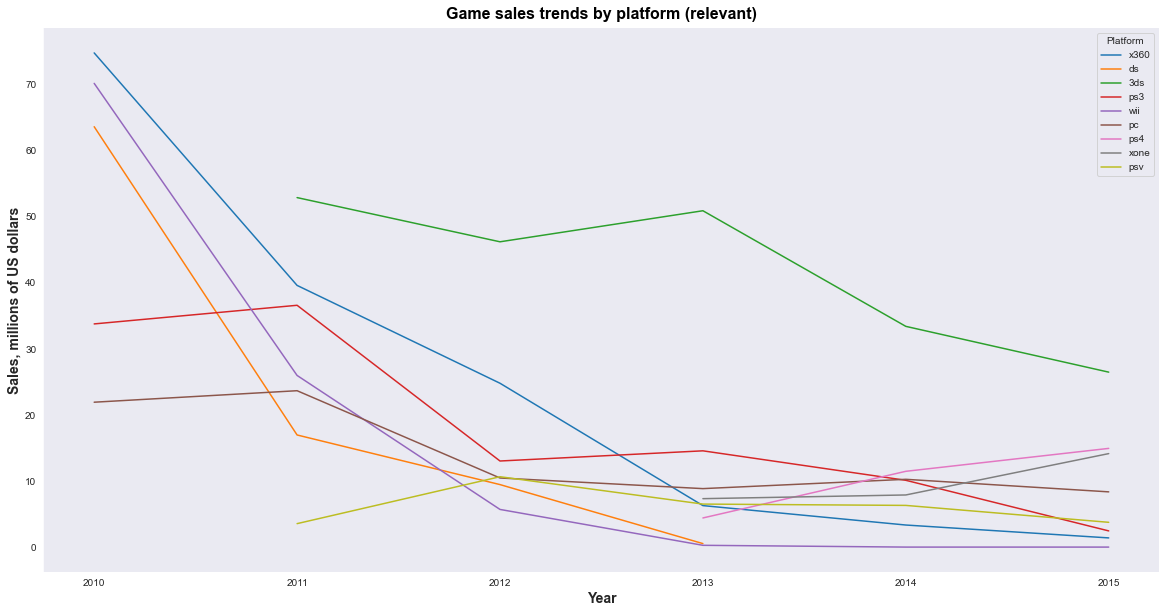

In [39]:
platforms = df_games_actual['platform'].unique()

for platform in platforms:
     df_games_actual.query('platform == @platform').groupby(by='year_of_release')['total_sales'].sum().plot(label = platform)

        
plt.title('Game sales trends by platform (relevant)', **title_font)
plt.xlabel('Year', **axis_font)
plt.ylabel('Sales, millions of US dollars', **axis_font)
sns.despine()
plt.legend(title='Platform')
plt.grid(False)
plt.show()

During the time period under review, there is a general downward trend for all platforms, with the exception of **ps4** and **xone**. The peak of sales for the other platforms under consideration has passed, so they should not be targeted when planning an advertising campaign for 2017. 

Since the new platforms have a positive trend: **ps4** and **xone**, which were introduced in 2013 and are in the first half of the sales cycle, they should be used to get information for planning an advertising campaign in 2017. Despite the fact that **3ds** is still in first place in sales, it should be noted that its sales figures are falling.

<div style="font-size: 20px">
    
**Determining the impact of reviews on sales**

In [40]:
# Platforms for analysis and columns for verification
top_platform_choice = ['ps4', 'xone']

columns_to_check = [['critic_score',"Critics' reviews"], ['user_score', "Users' reviews"]]

colors = ('blue','green', 'yellow', 'red', 'orange')

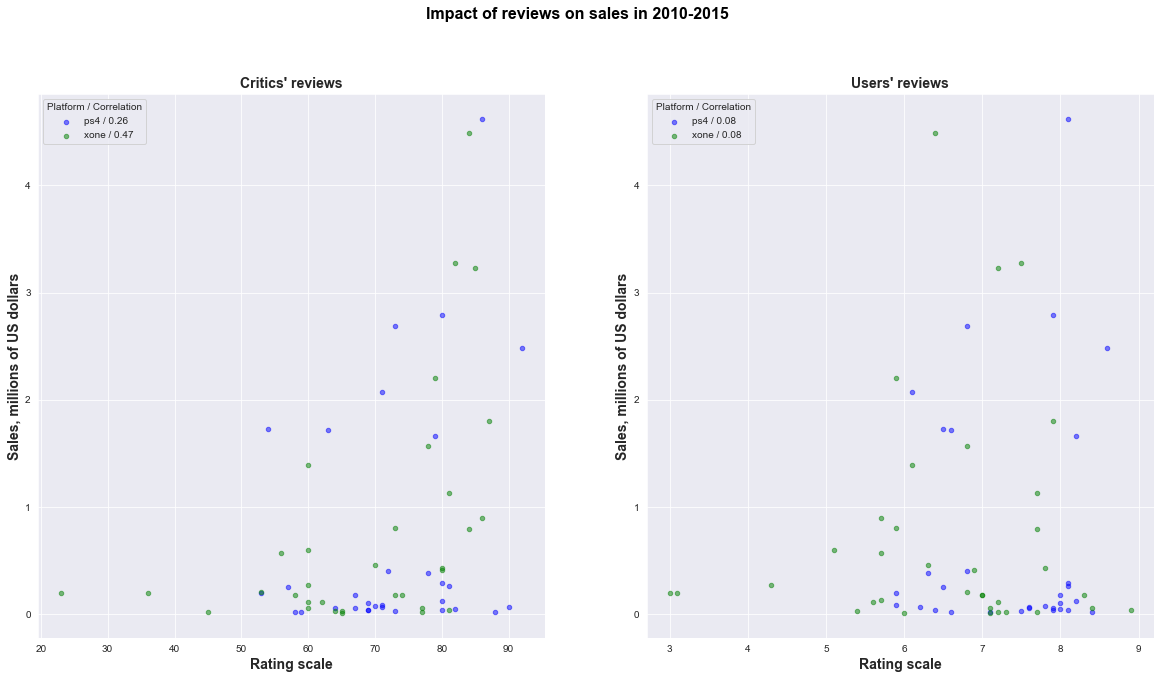

In [41]:
fig, axes = plt.subplots(ncols = len(columns_to_check))
fig.suptitle('Impact of reviews on sales in 2010-2015', **title_font)

for i, column in enumerate(columns_to_check):
    ax = axes[i]
    for j, platform in enumerate(top_platform_choice):
        temp = df_games_actual.query('platform == @platform')
        corr = round(temp[column[0]].astype(float).corr(temp['total_sales'].astype(float)), 2)
        label = '{} / {}'.format(platform, corr)
        temp.plot(x=column[0], y='total_sales', kind='scatter', label=label, color = colors[j], alpha = 0.5, ax = ax)
    
    ax.set_xlabel('Rating scale',**axis_font)
    ax.set_ylabel('Sales, millions of US dollars',**axis_font)
    ax.set_title(column[1], **axis_font)
    ax.legend(title='Platform / Correlation')
plt.show()

Critics' reviews have an average effect on the platform's sales - Correlation coefficient: from 0.26 to 0.47

Users' reviews have almost no effect on the sales of the platform - Correlation coefficient: 0.08

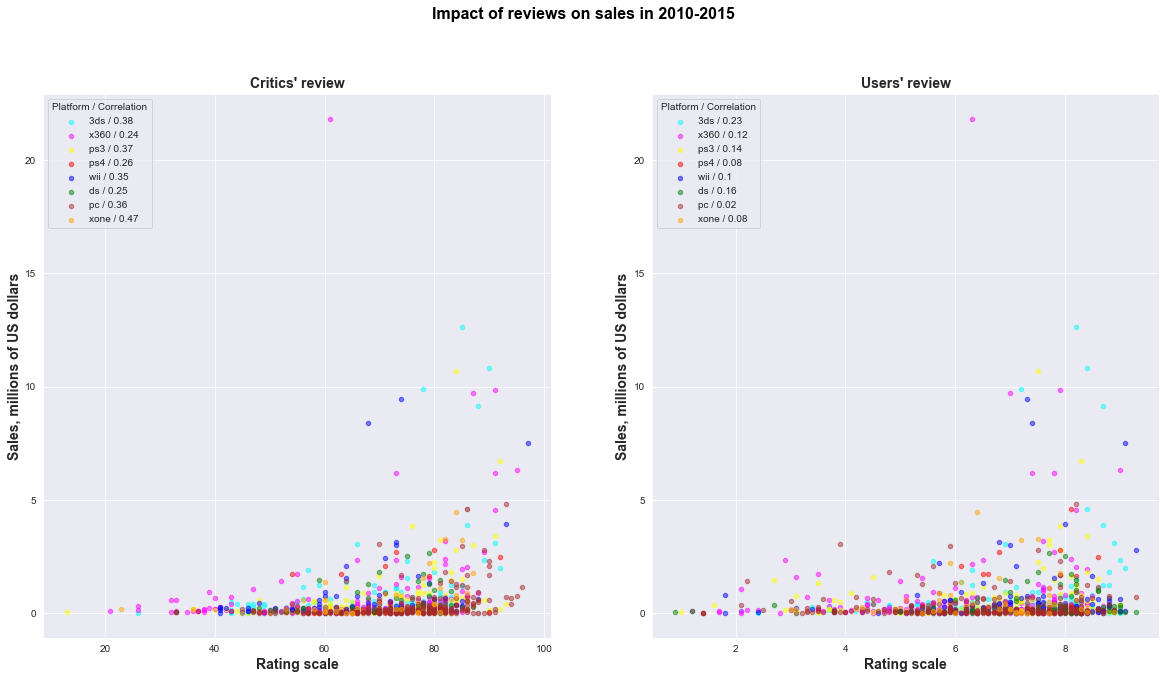

In [42]:
# Платформы для анализа и столбцы для проверки
#top_platforms = ['x360', 'ps3', 'wii', 'ds', 'pc']
top_platforms = ['3ds', 'x360', 'ps3', 'ps4', 'wii', 'ds', 'pc', 'xone']

columns_to_check = [['critic_score',"Critics' review"], ['user_score', "Users' review"]]

colors = ('cyan','magenta','yellow','red','blue', 'green','brown', 'orange')


fig, axes = plt.subplots(ncols = len(columns_to_check))
fig.suptitle('Impact of reviews on sales in 2010-2015', **title_font)

for i, column in enumerate(columns_to_check):
    ax = axes[i]
    for j, platform in enumerate(top_platforms):
        temp = df_games_actual.query('platform == @platform')
        corr = round(temp[column[0]].astype(float).corr(temp['total_sales'].astype(float)), 2)
        label = '{} / {}'.format(platform, corr)
        temp.plot(x=column[0], y='total_sales', kind='scatter', label=label, color = colors[j], alpha = 0.5, ax = ax)
    
    ax.set_xlabel('Rating scale',**axis_font)
    ax.set_ylabel('Sales, millions of US dollars',**axis_font)
    ax.set_title(column[1], **axis_font)
    ax.legend(title='Platform / Correlation', loc='upper left')
plt.show()

To plan an advertising campaign for 2017, you need to take into account for all platforms:

* Critics' reviews have an average effect on sales,


* Users' reviews have almost no effect on sales.

<div style="font-size: 20px">
    
**Determining the influence of genres on sales**

In [43]:
df_genres_actual = df_games_actual.pivot_table(index = ['genre'], values = 'total_sales', aggfunc={'count','sum'}).reset_index().sort_values(by=['sum'], ascending=False)

# Find the unit profit
df_genres_actual['unit_profit'] = df_genres_actual['sum'] / df_genres_actual['count']
colors = ['blue', 'green', 'orange']

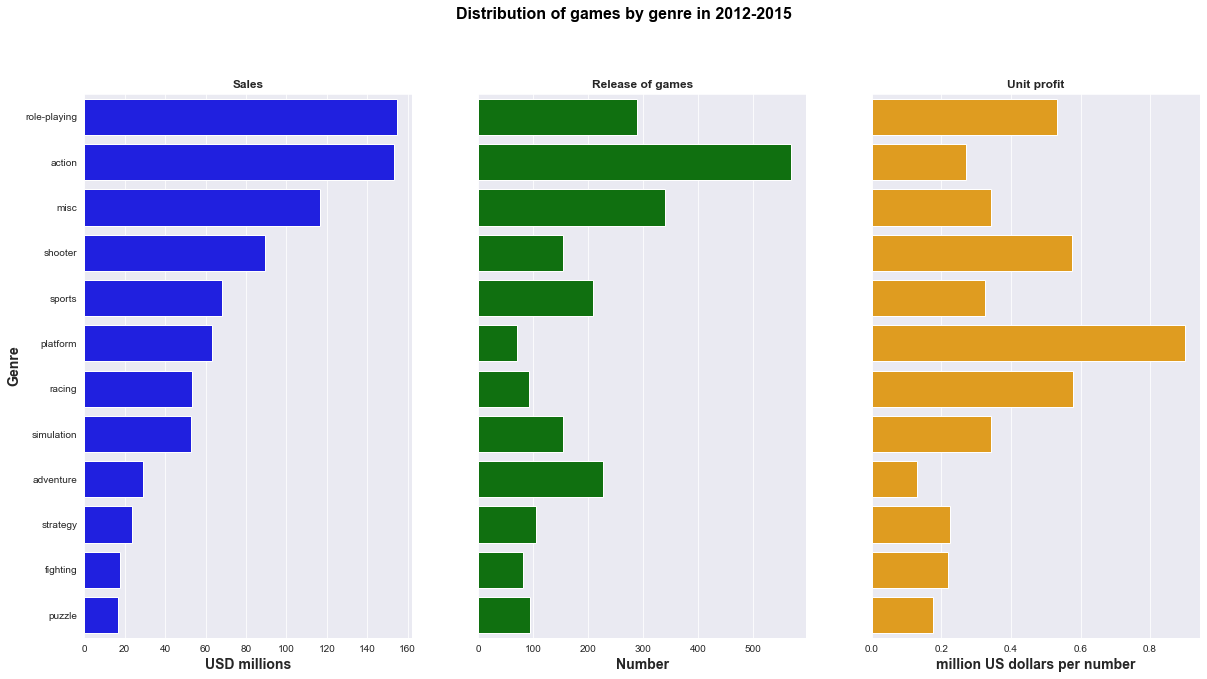

In [44]:
fig, (ax1, ax2, ax3) = plt.subplots(
    ncols=3
)

fig.suptitle('Distribution of games by genre in 2012-2015', **title_font)

g1 = sns.barplot(
    x='sum',
    y='genre',
    data=df_genres_actual,
    ax=ax1,
    color=colors[0]
)

g2 = sns.barplot(
    x='count',
    y='genre',
    data=df_genres_actual,
    ax=ax2,
    color=colors[1]
)

g3 = sns.barplot(
    x='unit_profit',
    y='genre',
    data=df_genres_actual,
    ax=ax3,
    color=colors[2]
)

g1.set_title('Sales', weight='bold')
g2.set_title('Release of games', weight='bold')
g3.set_title('Unit profit', weight='bold')
g1.set_xlabel('USD millions', **axis_font)
g2.set_xlabel('Number', **axis_font)
g3.set_xlabel('million US dollars per number', **axis_font)
g1.set_ylabel('Genre', **axis_font)
g2.set_ylabel('')
g3.set_ylabel('')
g2.set_yticklabels([])
g3.set_yticklabels([])
plt.show()

The best-selling genres in 2010-2015: Action, Misc and Role-Playing.

The unit profit of games in the Platform genre is the highest. Games in the Adventure genre, on the contrary, have one of the lowest unit profits.

<div style="font-size: 20px">
    
**Intermediate conclusion:**

To plan an advertising campaign for 2017, you need:

Analyze sales since 2010. Sales before 2010 were at the peak of the popularity of game consoles of previous generations.

Take into account the average period of active sales on the gaming platform — 6-7 years.

Focus on the PS4 and XOne platforms. 

Take into account the average impact of critics' reviews on sales. Users' reviews have almost no effect on sales on promising platforms.

Focus on the Role-Playing genre. This is one of the most popular genre and it has one of the highest average rates of unit profit. The Action and Misc genres are also popular, but they have the usual indicators of average unit profit. The Platform and Racing genres are less popular, but they have a high average unit profit.

# 4. Portrait of the user of each region

In [45]:
# We will leave in the current dataframe data only on the 5 most popular platforms and genres (by sales)
top_platforms = ['3ds', 'x360', 'ps3', 'ps4', 'xone']
#top_genres = ['role-playing', 'action', 'misc', 'shooter', 'sports', None]

#df_games_actual = df_games_actual.query('(platform in @top_platforms) and (genre in @top_genres)')
df_games_actual = df_games_actual.query('(platform in @top_platforms)')

In [46]:
# let's create a dictionary of total sales by region
total_sales = {'na_sales':df_games_actual['na_sales'].sum(),
           'eu_sales':df_games_actual['eu_sales'].sum(),
           'jp_sales':df_games_actual['jp_sales'].sum(),
           'other_sales':df_games_actual['other_sales'].sum()}

In [47]:
# creating a list of regions
regions = [['na_sales','NA','North America','North America'],
           ['eu_sales','EU','Europe','Europe'],
           ['jp_sales','JP','Japan','Japan'],
           ['other_sales','RoW','The rest of the world','The rest of the world']
          ]

<div style="font-size: 20px">
    
**Popularity of platforms depending on the region:**

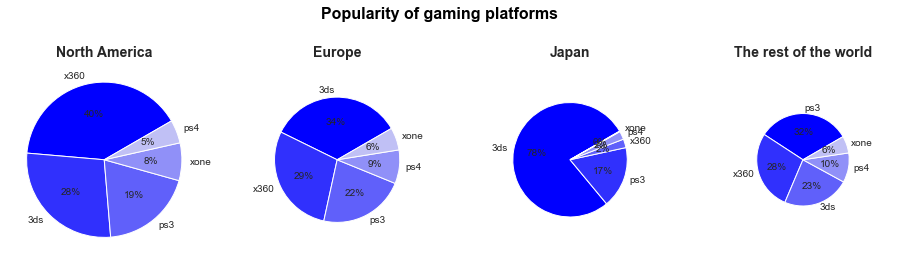

In [48]:
fig, axes = plt.subplots(1, len(regions), figsize=(16,4))

for i, region in enumerate(regions):
    # diagram number in the figure
    ax = axes[i]
    # data calculation
    x = df_games_actual.groupby(by='platform')[region[0]].sum().sort_values(ascending=False)
    radius = m(total_sales[region[0]] / max(total_sales.values()))
    # plotting
    ax.pie(x,
          labels = x.index,
          autopct = '%1.0f%%',
          radius = radius,
          colors = sns.light_palette(colors[0], reverse=True),
          startangle=30)
    ax.set_title(region[3], **axis_font)
    
plt.suptitle('Popularity of gaming platforms', **title_font)
plt.show()

* In North America, the most popular platform is X360, in Europe and Japan, the most popular platform is 3ds, and in other countries, the most popular platform is ps3. In Japan, 3ds leads by a large margin. 


* The second most popular in North America is 3ds, in Europe and other countries (except Japan) - x360, Japan - PS3


* The top 3 most popular platforms for all countries are X360, PS3, 3ds

<div style="font-size: 20px">
    
**Popularity of genres depending on the region:**

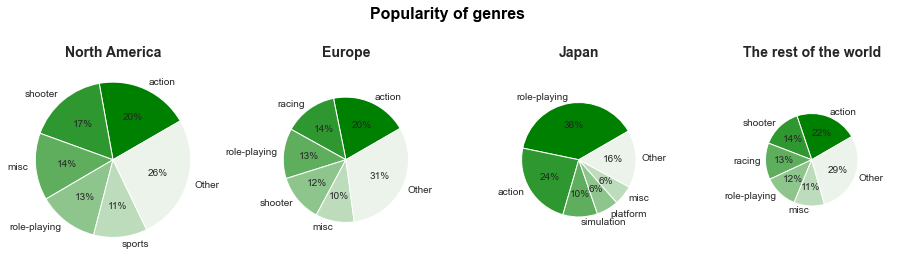

In [49]:
# declaring the structure of a plotting
fig, axes = plt.subplots(1, len(regions), figsize=(16, 4))

for i, region in enumerate(regions):
    # diagram number in the figure
    ax = axes[i]
    # calculation of data for the top 5 parameter
    x = df_games_actual.groupby(by='genre')[region[0]].sum().sort_values(ascending=False).head(5)
    # calculation of data for positions outside the top 5 parameter
    other = pd.Series({'Other': total_sales[region[0]]-x.sum()})
    # merging into one structure
    x = x.append(other)
    # formation of graph radius 
    rad = m(total_sales[region[0]] / max(total_sales.values()))
    # plotting graphs in the figure
    ax.pie(x,
           labels = x.index,
           autopct = '%1.0f%%',
#           pctdistance = 1.3,          
           radius = rad,
           colors=sns.light_palette(colors[1], reverse=True),
           startangle=30)
    ax.set_title(region[3],**axis_font)


plt.suptitle('Popularity of genres', **title_font)

plt.show()

* In all countries (except Japan), the first in popularity is the Action genre. In Japan - Role-playing, a 2-position Action;

* In second position in North America and other countries (except Japan) - Shooter, in Europe - Racing, and Japan - Action

* In all countries (except Japan), the top 4 in popularity are Action, Shooter, Role-playing and Misc. In Japan - Action, Simulation, Role-playing, Platform and Misc

<div style="font-size: 20px">
    
**The impact of the ESRB rating on sales in the regions:**

In [50]:
# ESRB Rating Dictionary
esrb_dict = {
    'E': 'Everyone',
    'T': 'Teen',
    'M': 'Mature',
    'E10+': 'Everyone 10 \n and older',
    'EC': 'Early childhood',
    'K-A': 'Kids to Adults',
    'RP': 'Rating Pending',
    'AO': 'Adults Only 18+',
    'Other':'No rating'
}

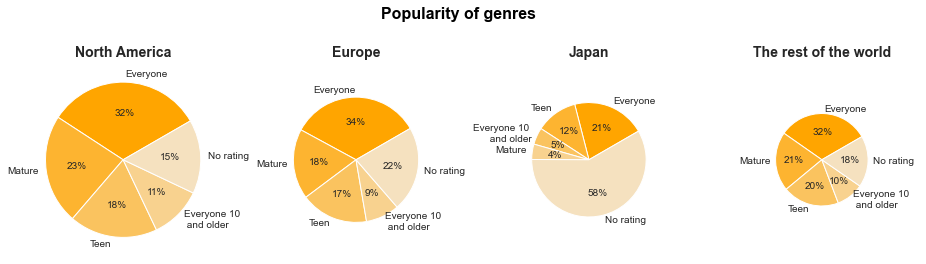

In [51]:
# declaring the structure of a drawing
fig, axes = plt.subplots(1, len(regions), figsize=(16, 4))

for i, region in enumerate(regions):
    # diagram number in the figure
    ax = axes[i]
    # calculation of data for the top 5 parameter
    x = df_games_actual.groupby(by='rating')[region[0]].sum().sort_values(ascending=False).head(5)
    # calculation of data for positions outside the top 5 parameter
    other = pd.Series({'Other': total_sales[region[0]]-x.sum()})
    # merging into one structure
    x = x.append(other)
    # formation of graph radius
    rad = m(total_sales[region[0]] / max(total_sales.values()))
    # plotting graphs in the figure
    ax.pie(x,
           labels = [esrb_dict[x] for x in x.index],
           autopct = '%1.0f%%',
#           pctdistance = 1.3,          
           radius = rad,
           colors=sns.light_palette(colors[2], reverse=True),
           startangle=30)
    ax.set_title(region[3],**axis_font)


plt.suptitle('Popularity of genres', **title_font)

plt.show()

* In all countries (except Japan), the most popular games are games without age restrictions (**Everyone**). In second place in all countries (except Japan) games for adults (**Mature **), then games for teenagers (**Teen**). 


* All regions have a significant share of games without a rating (from 15 to 22%), but in Japan this figure exceeds half (58%)

<div style="font-size: 20px">
    
**Intermediate conclusion:**

* The top 3 most popular platofrms for all countries (excluding Japan) is X360, PS3, 3DS


* In all countries (except Japan), the top 4 in popularity are Action, Shooter, Role-playing and Misc. In Japan - Action, Simulation, Role-playing, Platform and Misc


* In all countries, the most popular games are games without age restrictions (Everyone). In second place in all countries (except Japan) games for adults (Mature), games for teenagers (Teen) in second place in Japan and 3 in the rest of the world


* It is important to note that there are a large number of missing values in the ESRB rating positions in all regions. However, for all regions except Japan, this does not significantly distort the conclusions. In Japan, this figure is 58%, so it is not possible to correctly predict the popularity of the genre for this region. 


* According to the ESRB rating, sales and popular genres can be predicted in various regions (except Japan): games for all ages, adults and teenagers are popular in all regions. Japan is a special region for which the ESRB rating is not a reliable source for forecasts. A possible reason is the cultural characteristics of this country, which are most likely manifested during the assessments. To determine the rating, the publisher sends a video to the ESRB, which contains the most impressive and sharp scenes of the game. The publisher also fills out a special questionnaire with information about the content of the game. The ESRB website reports that reviewers then independently evaluate the product and determine the rating. The rating is evaluated by many people of different ages and social strata. These may be former school teachers, parents, professionals and various employees from other fields of activity not related to the gaming industry. If the reviewers agree in their assessment, brief descriptions are added to the rating and the ESRB notifies the publisher of its decision. 

Thus, the score is set when the reviewers' agreement is reached. The existing cultural differences of reviewers probably lead to such a large number of missing values for games in Japan.

# 5. Hypothesis testing

**Average user ratings for Xbox One and PC platforms**

Since it is required to find out whether the user ratings on these platforms are the same (i.e. equal), then we formulate:

**Null hypothesis** as follows: The user ratings of the general population of the Xbox One and PC platforms are equal.

**Alternative hypothesis**: The user ratings of the general population of the Xbox One and PC platforms differ.

Thus, we test the hypothesis about the equality of the average values of the general population.

In [52]:
# Threshold for comparison when evaluating p-value
alpha = 0.05

array1 = df_games.loc[(df_games['platform'] == 'xone') & (df_games['user_score'].notna() == True)]['user_score']
array2 = df_games.loc[(df_games['platform'] == 'pc') & (df_games['user_score'].notna() == True)]['user_score']

result = scipy.stats.ttest_ind(array1, array2, equal_var=False)

print('p-value:', result.pvalue)
if result.pvalue < alpha:
    print("We reject the null hypothesis")
else:
    print('It is impossible to reject the null hypothesis')

p-value: 0.024923807198891233
We reject the null hypothesis


In [53]:
# checking the conclusions
df_games.query('platform == "xone" or platform == "pc"').pivot_table(
    index=['platform'],
    values=['user_score'],
    aggfunc='mean'
)

,user_score
platform,
pc,7.107915
xone,6.562857


**Average user ratings of Action and Sports genres**

Since it is required to find out whether the user ratings for these genres are the same (i.e. excellent), then we formulate:

**Null hypothesis** as follows: User ratings of the general population of the Action and Sports genres are equal.

**Alternative hypothesis**: User ratings of the general population of the Action and Sports genres differ.

Thus, we test the hypothesis about the equality of the average values of the general population.

In [54]:
# Threshold for comparison when evaluating p-value
alpha = 0.05

array1 = df_games.loc[(df_games['genre'] == 'action') & (df_games['user_score'].notna() == True)]['user_score']
array2 = df_games.loc[(df_games['genre'] == 'sports') & (df_games['user_score'].notna() == True)]['user_score']

result = scipy.stats.ttest_ind(array1, array2, equal_var=False)

print('p-value:', result.pvalue)
if result.pvalue < alpha:
    print("We reject the null hypothesis")
else:
    print('It is impossible to reject the null hypothesis')

p-value: 0.07237739326452464
It is impossible to reject the null hypothesis


In [55]:
# проверка выводов
df_games_actual.query('genre == "action" or genre == "sports"').pivot_table(
    index=['genre'],
    values=['user_score'],
    aggfunc='mean'
)

,user_score
genre,
action,6.725694
sports,5.840299


<div style="font-size: 20px">
    
**Intermediate conclusion:**

* Null hypothesis: User ratings of the general aggregates of the Xbox One and PC platforms are equal - **incorrect**. An alternative hypothesis is true: The user ratings of the general aggregates of the Xbox One and PC platforms differ with a probability of almost 100%


* Null hypothesis: User ratings of the general aggregates of the Action and Sports genres are equal - **true**.

# 6. Final conclusion

**Identified patterns for planning an advertising campaign:**


* Revenue should be forecast based on data after the start of the sales decline since 2010.


* The average period of active sales on the gaming platform is 6-7 years.


* Total sales on Microsoft's X360 platform significantly exceed sales of Sony set-top boxes.


* Critics' ratings have an average impact on sales. User ratings have almost no effect.


* Top 3 best-selling genres in 2010-2015: Action, Misc and Role-Playing. Top 3 best-selling consoles X360, PS3, 3DS.


**Criteria for the success of the game for planning an advertising campaign:**


* Platform:

In North America, the most popular platform is X360, in Europe and Japan, the most popular platform is 3ds, and in other countries, the most popular platform is ps3. In Japan, 3ds leads by a large margin.


* Genre:

In all countries (except Japan), the top 4 in popularity are Action, Shooter, Role-playing and Misc. In Japan - Action, Simulation, Role-playing, Platform and Misc
In all countries, the most popular games are games without age restrictions (Everyone). In second place in all countries (except Japan) games for adults (Mature), games for teenagers (Teen) in second place in Japan and 3 in the rest of the world


* ESRB rating:

In all regions (except Japan), games without age restrictions are popular, in second place everywhere, games for adults and teenagers. Japan is a special region for which the application of the ESRB rating cannot lead to correct conclusions (due to cultural differences). For forecasts in this region, national ratings should be used (for example, **CERO**).

**General recommendations for the advertising campaign for 2017:**

1) In the short term (for 2017), attention should be focused on x360 game consoles (primarily for North America), PS3 (primarily for Europe and other countries except Japan) 3DS (for Japan). Attention to the top-3 prefixes not specified in the recommendation "first of all" for the region earlier should be paid proportionally to the market share, based on the following logic:

* The top 3 platforms are approaching or are already in the middle of the sales lifecycle, i.e. the estimated maximum duration of making a profit on them is 3-4 years;

* The PS4 and XOne platforms show good dynamics - they are only gaining sales momentum, so the development of games for these platforms in the future 1-2 years seems promising

2) As genres, it is necessary to choose Action, Shooter, Role-playing and Misc, while it should be borne in mind that games without age restrictions are most popular, then for adults (everywhere except Japan) and for teenagers